In [1]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# If you want to threshold: specify a t
# If recordid indexing is not 0-based: specify indexing (e.g. 1 for 1-based indexing)
def pairs_to_matrix(pair_array, nrecords, t=None, indexing=0):
    m = np.zeros((nrecords, nrecords))
    for row in pair_array:
        if row[0] < row[1]:
            idx = (int(row[0]) - indexing, int(row[1]) - indexing)
        else:
            idx = (int(row[1]) - indexing, int(row[0]) - indexing)
            
        is_similar = False
        if t is not None:
            is_similar = row[2] > t
        else:
            is_similar = bool(row[2])
            m[idx[0], idx[1]] = bool(row[2])
            
        m[idx[0], idx[1]] = is_similar
        m[idx[1], idx[0]] = is_similar
    return m
              

In [3]:
def jaccard_similarity(A, B):
    A = set(A)
    B = set(B)
    n = len(A.intersection(B))
    return n / float(len(A) + len(B) - n) 

def jaccard_for_pairs(records):
    sims = []
    n_records = len(records)
    for i,rec_i in enumerate(records):
        for j,rec_j in enumerate(records):
            if i<j:
                sims.append([i, j, jaccard_similarity(rec_i, rec_j)])
#                 sims[(i,j)] = jaccard_similarity(rec_i, rec_j)
    return np.array(sims)

# Evaluating synthetic test data

## No classes -- all random data

Took 1.760553s to run -- verify this

In [4]:
# No classes -- all random data
with open("../data/noclass_random_data.txt") as f:
    records = f.readlines()
records = [x.split("\t")[1].strip() for x in records]

bf_jaccard = jaccard_for_pairs(records)
mhlsh_jaccard = np.loadtxt("../results/noclass_random_candidates.txt", delimiter="\t", skiprows=1)

nrecords = 1000
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.

print "This should ideally predict that exactly 0 pairs are similar, but in reality we have some false positives."
print class_results
print confusion

/homes/gws/kdorosch/software/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


This should ideally predict that exactly 0 pairs are similar, but in reality we have some false positives.
             precision    recall  f1-score   support

        0.0       1.00      0.93      0.96   1000000
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.93      0.96   1000000

[[930144  69856]
 [     0      0]]


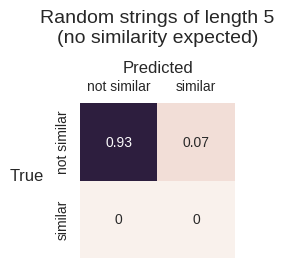

In [5]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Random strings of length 5\n(no similarity expected)", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_synth_random.png", dpi=300, bbox_inches='tight')

plt.show()

## One class, and the rest is random data

Took 24.717346s to run.

In [6]:
# One class, and the rest is random data
with open("../data/oneclass_random_data.txt") as f:
    records = f.readlines()
records = [x.split("\t")[1].strip() for x in records]

bf_jaccard = jaccard_for_pairs(records)
mhlsh_jaccard = np.loadtxt("../results/oneclass_random_candidates.txt", delimiter="\t", skiprows=1)

nrecords = 1000
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict that 1/4 the pairs are similar. "
print class_results
print confusion
print norm_confusion

This should predict that 1/4 the pairs are similar. 
             precision    recall  f1-score   support

        0.0       1.00      0.93      0.96    750500
        1.0       0.82      1.00      0.90    249500

avg / total       0.95      0.94      0.95   1000000

[[696402  54098]
 [   998 248502]]
[[ 0.696402  0.054098]
 [ 0.000998  0.248502]]


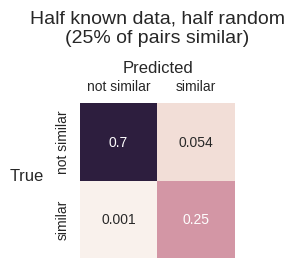

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Half known data, half random\n(25% of pairs similar)", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_synth_oneclass_random.png", dpi=300, bbox_inches='tight')

plt.show()

## Two classes, both are known

Took 24.256424s to run

In [8]:
# Two classes, both are known
with open("../data/twoclass_data.txt") as f:
    records = f.readlines()
records = [x.split("\t")[1].strip() for x in records]

bf_jaccard = jaccard_for_pairs(records)
mhlsh_jaccard = np.loadtxt("../results/twoclass_candidates.txt", delimiter="\t", skiprows=1)

nrecords = 1000
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict that half the pairs are similar. "
print class_results
print confusion
print norm_confusion

This should predict that half the pairs are similar. 
             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00    501000
        1.0       0.99      1.00      1.00    499000

avg / total       1.00      1.00      1.00   1000000

[[498004   2996]
 [  1996 497004]]
[[ 0.498004  0.002996]
 [ 0.001996  0.497004]]


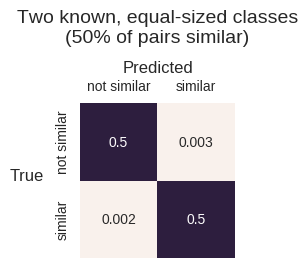

In [9]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Two known, equal-sized classes\n(50% of pairs similar)", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_synth_twoclass.png", dpi=300, bbox_inches='tight')
plt.show()

# Checking the cora titles data

## h = 90, m=9, k=10, b=?

In [10]:
# Checking the cora titles data -- little faith in this

# cora_titles_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
# cora_titles_mhlsh = np.loadtxt("../results/cora_titles_minhash-lsh-90.txt", delimiter="\t", skiprows=1)

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-90.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.54      0.70   1638564
        1.0       0.05      0.99      0.09     38461

avg / total       0.98      0.55      0.69   1677025

[[890142 748422]
 [   260  38201]]
[[  5.30786363e-01   4.46279572e-01]
 [  1.55036448e-04   2.27790283e-02]]


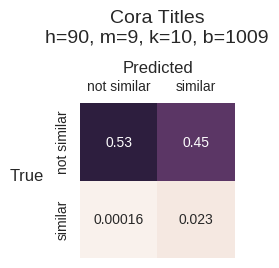

In [11]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=90, m=9, k=10, b=1009", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m9b1009.png", dpi=300, bbox_inches='tight')

plt.show()

## Increasing lsh bins: b=5461

Took 4m 33.957273s to run.

In [12]:
# Cora titles -- this time with more bins in the lsh (5461, which is prime)

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles-5641bins.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict fewer false positives than when we had fewer bins"
print class_results
print confusion
print norm_confusion

This should predict fewer false positives than when we had fewer bins
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.79   1638564
        1.0       0.06      0.99      0.12     38461

avg / total       0.98      0.67      0.78   1677025

[[1079878  558686]
 [    260   38201]]
[[  6.43924807e-01   3.33141128e-01]
 [  1.55036448e-04   2.27790283e-02]]


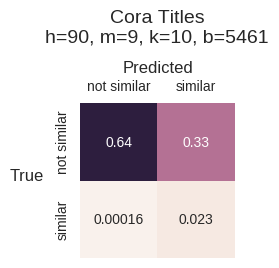

In [13]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=90, m=9, k=10, b=5461", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m9b5461.png", dpi=300, bbox_inches='tight')

plt.show()

## Testing the effect of very few bins b={10, 11, 7, 17}

Took 4 m 41 s to run

/homes/gws/kdorosch/software/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This should predict almost everything as a false positive
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00   1638564
        1.0       0.02      1.00      0.04     38461

avg / total       0.00      0.02      0.00   1677025

[[      0 1638564]
 [      0   38461]]
[[ 0.          0.97706594]
 [ 0.          0.02293406]]


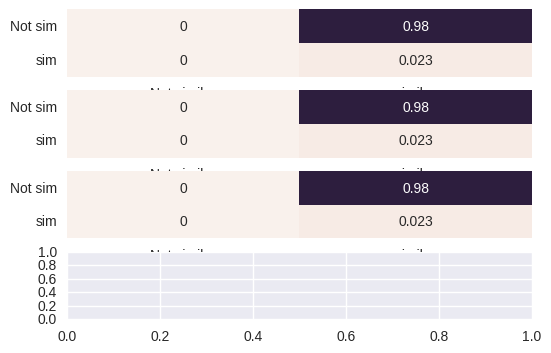

In [14]:
# Cora titles -- only 10 bins

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-10bins.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict almost everything as a false positive"
print class_results
print confusion
print norm_confusion
fig, ax = plt.subplots(4)
ax[0] = sns.heatmap(norm_confusion, cbar=False, annot=True, xticklabels=["Not similar", "similar"], yticklabels=["Not sim", "sim"], ax=ax[0])


## 11 bins second trial


bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m9b11.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
ax[1] = sns.heatmap(norm_confusion, cbar=False, annot=True, xticklabels=["Not similar", "similar"], yticklabels=["Not sim", "sim"], ax=ax[1])


# 7 bins

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m9b7.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
ax[2] = sns.heatmap(norm_confusion, cbar=False, annot=True, xticklabels=["Not similar", "similar"], yticklabels=["Not sim", "sim"], ax=ax[2])



# ### 17 bins

# bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
# mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m9b17.txt", delimiter="\t", skiprows=1)

# nrecords = 1295
# t = 0.8

# bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
# mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

# y_true = bf_mat.flatten()
# y_pred = mhlsh_mat.flatten()

# class_results = classification_report(y_true, y_pred)
# confusion = confusion_matrix(y_true, y_pred)
# norm_confusion = confusion/nrecords**2.
# ax[3] = sns.heatmap(norm_confusion, cbar=False, annot=True, xticklabels=["Not similar", "similar"], yticklabels=["Not sim", "sim"], ax=ax[3])


# plt.show()

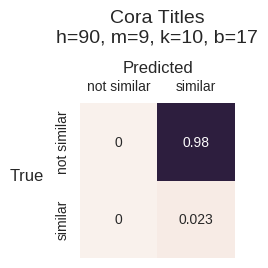

In [15]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=90, m=9, k=10, b=17", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m9b17.png", dpi=300, bbox_inches='tight')

plt.show()

## Further increasing LSH bins while holding else constant b=8423

Took 5m 23.638746s to run

In [16]:
# Cora titles -- EVEN MORE BINS (8423)

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles-8423bins.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.79   1638564
        1.0       0.06      0.99      0.12     38461

avg / total       0.98      0.67      0.78   1677025

[[1079598  558966]
 [    260   38201]]
[[  6.43757845e-01   3.33308090e-01]
 [  1.55036448e-04   2.27790283e-02]]


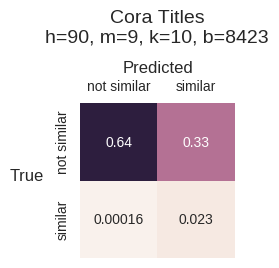

In [17]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=90, m=9, k=10, b=8423", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m9b8423.png", dpi=300, bbox_inches='tight')

plt.show()

# Cora titles -- testing effect of minhash functions

## m=23 h=322 k=14 b=1009

In [18]:
# Cora titles -- more minhash fns: m=23 h=322 k=14 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m23b1009.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.47      0.64   1638564
        1.0       0.04      0.99      0.08     38461

avg / total       0.98      0.48      0.63   1677025

[[767842 870722]
 [   260  38201]]
[[  4.57859603e-01   5.19206333e-01]
 [  1.55036448e-04   2.27790283e-02]]


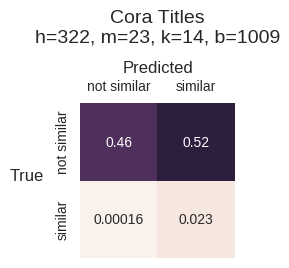

In [19]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=322, m=23, k=14, b=1009", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m23b1009.png", dpi=300, bbox_inches='tight')

plt.show()

# Cora titles

## More minhash fns than original, less than previous
## m=15 h=180 k=12 b=1009

In [20]:
# Cora titles -- more minhash fns: m=15 k= h= b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m15b1009.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.49      0.66   1638564
        1.0       0.04      0.99      0.08     38461

avg / total       0.98      0.50      0.65   1677025

[[804616 833948]
 [   260  38201]]
[[  4.79787719e-01   4.97278216e-01]
 [  1.55036448e-04   2.27790283e-02]]


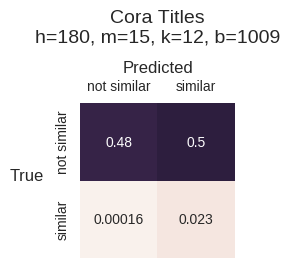

In [21]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=180, m=15, k=12, b=1009", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m15b1009.png", dpi=300, bbox_inches='tight')

plt.show()

## Many min hash functions m=55 h=990 k=18 b=1009

Hypothesis: increasing min hash functions probably helps but is then limited by the number of lsh bins because we are putting more things in the lsh array

In [22]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b1009.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.00      0.00   1638564
        1.0       0.02      1.00      0.04     38461

avg / total       0.98      0.02      0.00   1677025

[[   1784 1636780]
 [      0   38461]]
[[ 0.00106379  0.97600215]
 [ 0.          0.02293406]]


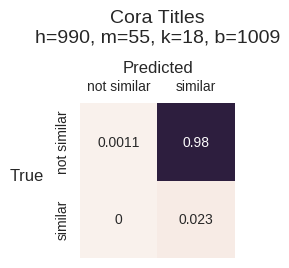

In [23]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=1009", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b1009.png", dpi=300, bbox_inches='tight')

plt.show()

# Cora titles -- testing the effect of more bins using increased #s of hash fns

## Many min hash functions m=55 h=990 k=18 b=2789

In [24]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b2789.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.20      0.33   1638564
        1.0       0.03      1.00      0.06     38461

avg / total       0.98      0.22      0.33   1677025

[[ 329184 1309380]
 [      0   38461]]
[[ 0.19629045  0.78077548]
 [ 0.          0.02293406]]


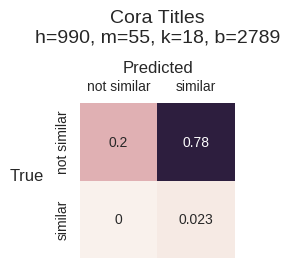

In [25]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=2789", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b2789.png", dpi=300, bbox_inches='tight')

plt.show()

## Many min hash functions m=55 h=990 k=18 b=9901

In [26]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b9901.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.41      0.59   1638564
        1.0       0.04      0.99      0.07     38461

avg / total       0.98      0.43      0.57   1677025

[[679998 958566]
 [   260  38201]]
[[  4.05478750e-01   5.71587186e-01]
 [  1.55036448e-04   2.27790283e-02]]


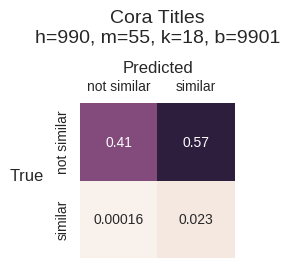

In [27]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=9901", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b9901.png", dpi=300, bbox_inches='tight')

plt.show()

## Many min hash functions m=55 h=990 k=18 b=103333

In [28]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b103333.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.79   1638564
        1.0       0.06      0.99      0.12     38461

avg / total       0.98      0.67      0.78   1677025

[[1079890  558674]
 [    260   38201]]
[[  6.43931963e-01   3.33133972e-01]
 [  1.55036448e-04   2.27790283e-02]]


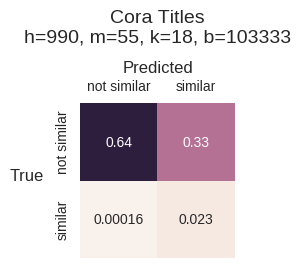

In [29]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=103333", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b103333.png", dpi=300, bbox_inches='tight')

plt.show()

## Many min hash functions m=55 h=990 k=18 b=1000003

We have likely reached the upper bound on the helpfulness of increasing lsh, and the number of minhash functions is again the limitation

In [30]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b1000003.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.79   1638564
        1.0       0.06      0.99      0.12     38461

avg / total       0.98      0.67      0.78   1677025

[[1079890  558674]
 [    260   38201]]
[[  6.43931963e-01   3.33133972e-01]
 [  1.55036448e-04   2.27790283e-02]]


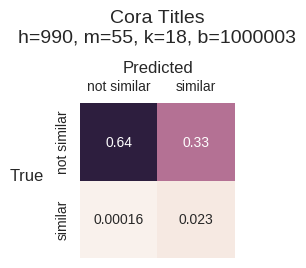

In [31]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=1000003", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b1000003.png", dpi=300, bbox_inches='tight')

plt.show()

## Many min hash functions m=55 h=990 k=18 b=10000019

We have likely reached the upper bound on the helpfulness of increasing lsh, and the number of minhash functions is again the limitation

In [32]:
# Cora titles -- more minhash fns: m=55 h=990 k=18 b=1009

bf_jaccard = np.loadtxt("../results/cora_titles_jaccardbf.txt", delimiter="\t")
mhlsh_jaccard = np.loadtxt("../results/cora_titles_minhash-lsh-m55b10000019.txt", delimiter="\t", skiprows=1)

nrecords = 1295
t = 0.8

bf_mat = pairs_to_matrix(bf_jaccard, nrecords, t=t)
mhlsh_mat = pairs_to_matrix(mhlsh_jaccard, nrecords, indexing=1)

y_true = bf_mat.flatten()
y_pred = mhlsh_mat.flatten()

class_results = classification_report(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)
norm_confusion = confusion/nrecords**2.
print "This should predict ???"
print class_results
print confusion
print norm_confusion

This should predict ???
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.79   1638564
        1.0       0.06      0.99      0.12     38461

avg / total       0.98      0.67      0.78   1677025

[[1079890  558674]
 [    260   38201]]
[[  6.43931963e-01   3.33133972e-01]
 [  1.55036448e-04   2.27790283e-02]]


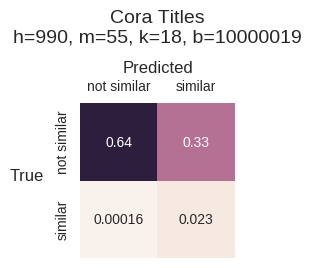

In [33]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["not similar", "similar"], 
                 yticklabels=["not similar", "similar"], 
                 ax=ax,
                 square=True)
ax.xaxis.tick_top()
ax.set_title("Cora Titles\nh=990, m=55, k=18, b=10000019", fontsize=14, y=1.35)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
fig.savefig("../plots/confusion_cora_titles_m55b10000019.png", dpi=300, bbox_inches='tight')

plt.show()